# Figure 5: PDL under correlated failures

## Load session data

In [4]:
from chi import ssh
import scripts.session as session
import scripts.ssh_helper as ssh_helper

session_data = session.load()
floating_ip = session_data["floating_ip"]
print("Got floating_ip: {}".format(floating_ip))

Got floating_ip: 129.114.109.238


## Experiment

Compute the burst tolerance for different MLEC schemes

In [26]:
with ssh.Remote(floating_ip) as conn:
    print("Now we run the experiments for Figure 5")
    conn.run("source ~/.bashrc && cd sc23-mlec/scripts/fig5 && bash exp.sh")

Now we run the experiments for Figure 5
Starting to compute burst tolerance for MLEC_C_C
Computing PDL under correlated failure bursts for erasure:(10+2)/(17+3)
total drives:	57600
drives_per_rack:	960
placement:	MLEC_C_C
MLEC_C_C Done
Starting to compute burst tolerance for MLEC_C_D
Computing PDL under correlated failure bursts for erasure:(10+2)/(17+3)
total drives:	57600
drives_per_rack:	960
placement:	MLEC_C_D
MLEC_C_D Done
Starting to compute burst tolerance for MLEC_D_C
Computing PDL under correlated failure bursts for erasure:(10+2)/(17+3)
total drives:	57600
drives_per_rack:	960
placement:	MLEC_D_C
MLEC_D_C Done
Starting to compute burst tolerance for MLEC_D_D
Computing PDL under correlated failure bursts for erasure:(10+2)/(17+3)
total drives:	57600
drives_per_rack:	960
placement:	MLEC_D_D
MLEC_D_D Done


## Fetch results

Fetch the results (data points) from remote server to this container

In [27]:
with ssh.Remote(floating_ip) as conn:
    for scheme in ["MLEC_C_C", "MLEC_C_D", "MLEC_D_C", "MLEC_D_D"]:
        conn.get("/home/cc/mlec-sim/src/theory/s-burst-theory-{}.log".format(scheme), "data/fig5/s-burst-theory-{}.log".format(scheme))

## Plotting

We now plot Figure 5 based on experiment results

In [4]:
from IPython.display import Image
!mkdir -p plots/fig5

Plotting Figure 5(a)...


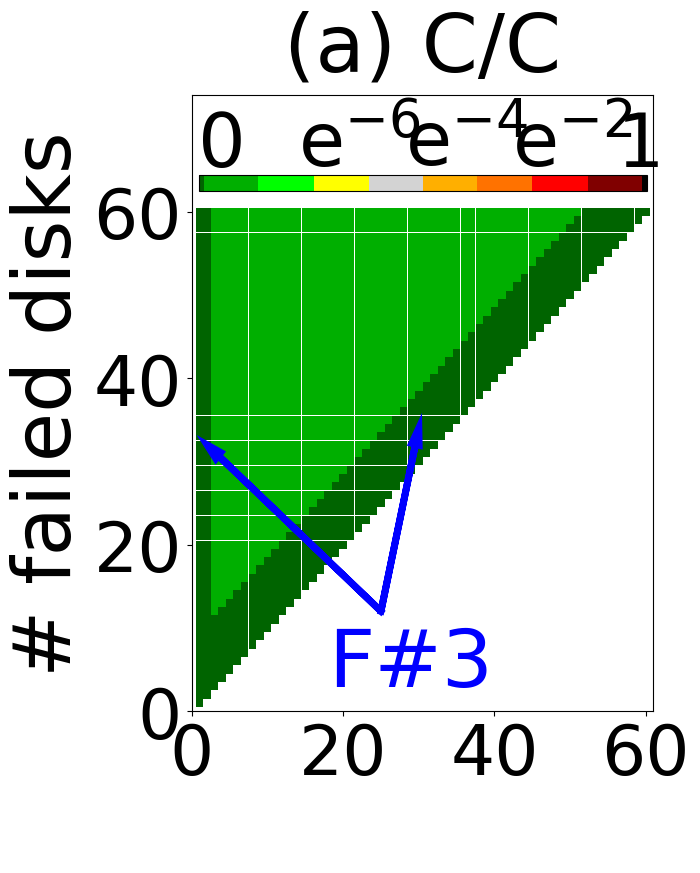

In [46]:
print("Plotting Figure 5(a)...")
!python3 scripts/fig5/plot-mcc.py data/fig5/s-burst-theory-MLEC_C_C.log plots/fig5/mcc.png
Image(filename='plots/fig5/mcc.png', width=200)

Plotting Figure 5(b)...


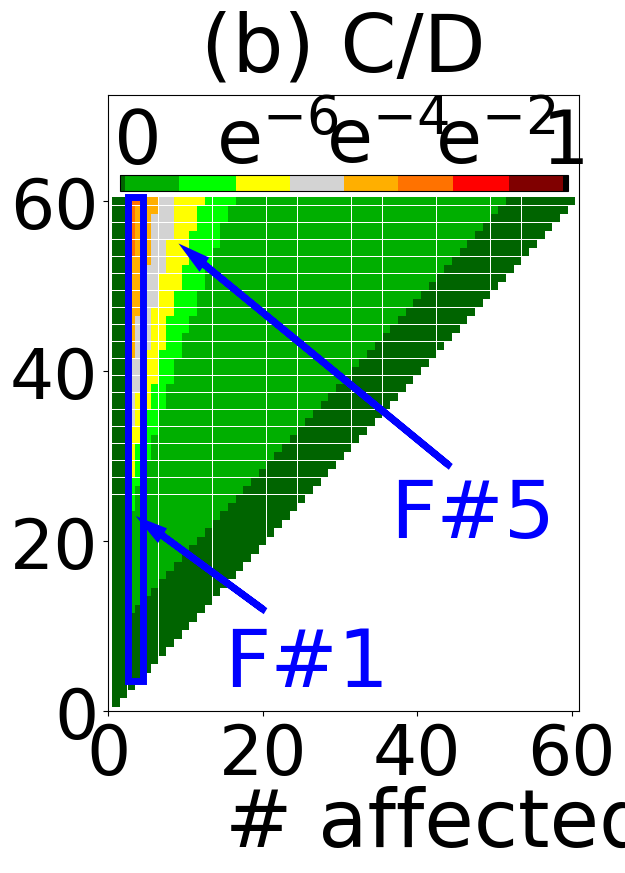

In [47]:
print("Plotting Figure 5(b)...")
!python3 scripts/fig5/plot-mcd.py data/fig5/s-burst-theory-MLEC_C_D.log plots/fig5/mcd.png
Image(filename='plots/fig5/mcd.png', width=200)

Plotting Figure 5(c)...


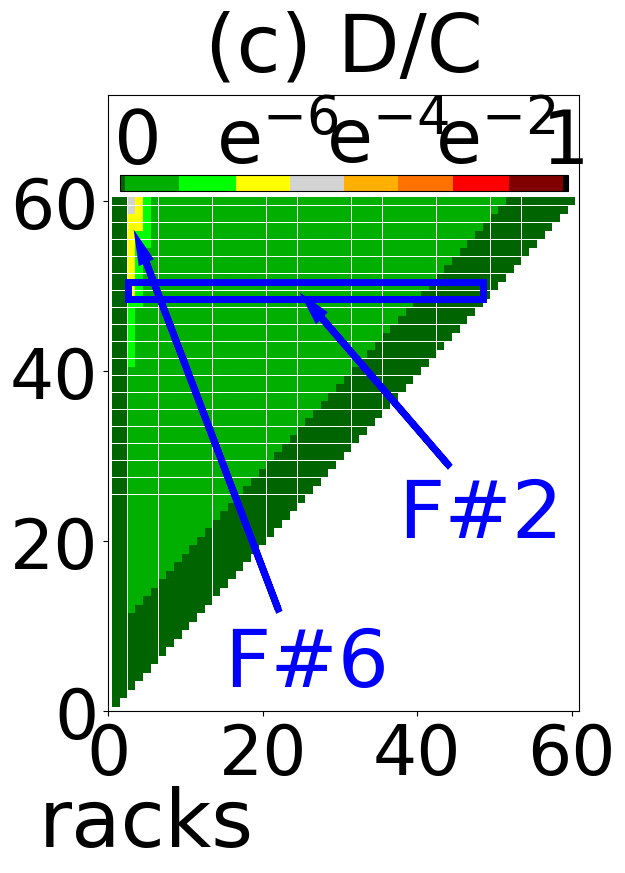

In [48]:
print("Plotting Figure 5(c)...")
!python3 scripts/fig5/plot-mdc.py data/fig5/s-burst-theory-MLEC_D_C.log plots/fig5/mdc.png
Image(filename='plots/fig5/mdc.png', width=200)

Plotting Figure 5(d)...


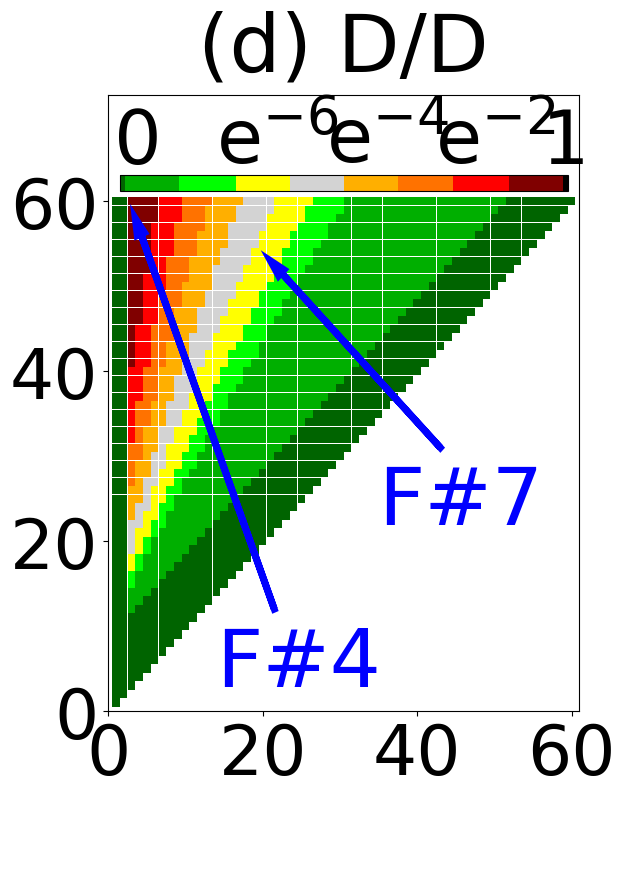

In [49]:
print("Plotting Figure 5(d)...")
!python3 scripts/fig5/plot-mdd.py data/fig5/s-burst-theory-MLEC_D_D.log plots/fig5/mdd.png
Image(filename='plots/fig5/mdd.png', width=200)